# TFM

**Objetivos:** 

**Fecha:** 

**Nombre:** Sergio Catalán Torralbo

## Importamos librerias y los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files  

In [2]:
data = pd.read_csv('data_raw.csv')

In [ ]:
!python --version

Python 3.7.14


In [3]:
data.shape

(3083, 354)

## Preproceso

### Información general del Dataset

In [4]:
data.columns

Index(['Unnamed: 0', 'ESTUDIO', 'ENTREV', 'CUES', 'TIPO_TEL', 'CCAA', 'PROV',
       'MUN', 'TAMUNI', 'CAPITAL',
       ...
       'IA_C2B_24', 'IA_C2B_25', 'IA_C3', 'IA_C4', 'RECUVOTOGR', 'RECUERDO',
       'CNO11R', 'ESTUDIOS', 'RELIGIONR', 'CLASESUB'],
      dtype='object', length=354)

In [5]:
data.shape

(3083, 354)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Columns: 354 entries, Unnamed: 0 to CLASESUB
dtypes: float64(208), int64(146)
memory usage: 8.3 MB


### Elección de variables de interes

Ahora seleccionaremos aquellas columnas que nos interesan de manera subjetiva, ya que consideramos que nos serán mas útiles para nuestros objetivos.



In [7]:
COL_UTIL = []
Preguntas_a_Usar = ['SEXO', 'EDAD', 'P2', 'P3', 'P4', 'P4B', 'P10', 'P16A', 'P16B', 'P17A_', 'P18','P18A', 'P26', 
                    'P26A', 'P27', 'P27A', 'P28', 'P29', 'P30', 'P30C_1','P30C_2','P30C_3', 'SITLAB', 'CNO11R', 'SITCONVIVEN', 'ESCUELA', 'ESTUDIOS', 
                    'RELIGIONR', 'CLASESUB']
for col in data.columns:
  if col in Preguntas_a_Usar or (col[0:len(col)-2]+'_') in Preguntas_a_Usar or (col[0:len(col)-3]+'_') in Preguntas_a_Usar:
    COL_UTIL.append(col)
data_util = data[COL_UTIL]


In [8]:
data_util['ESTUDIOS'].value_counts()

6    1215
5     595
3     519
4     390
2     253
1      84
9      19
7       8
Name: ESTUDIOS, dtype: int64

Comprobamos con que columnas nos hemos quedado finalmente

In [9]:
cols = data_util.columns # first 30 columns
cols

Index(['SEXO', 'EDAD', 'P2', 'P3', 'P4', 'P4B', 'P10', 'P16A', 'P16B',
       'P17A_1', 'P17A_2', 'P17A_3', 'P17A_4', 'P17A_5', 'P17A_6', 'P17A_7',
       'P17A_8', 'P17A_9', 'P17A_10', 'P17A_11', 'P17A_12', 'P17A_13',
       'P17A_14', 'P17A_15', 'P17A_16', 'P17A_17', 'P17A_18', 'P17A_19',
       'P17A_96', 'P17A_99', 'P18', 'P18A', 'P26', 'P26A', 'P27', 'P27A',
       'P28', 'P29', 'P30', 'P30C_1', 'P30C_2', 'P30C_3', 'SITLAB',
       'SITCONVIVEN', 'ESCUELA', 'CNO11R', 'ESTUDIOS', 'RELIGIONR',
       'CLASESUB'],
      dtype='object')

In [10]:
data_util.head()

,SEXO,EDAD,P2,P3,P4,P4B,P10,P16A,P16B,P17A_1,...,P30C_1,P30C_2,P30C_3,SITLAB,SITCONVIVEN,ESCUELA,CNO11R,ESTUDIOS,RELIGIONR,CLASESUB
0,1,55,2,2,NaN,NaN,2,1,1,2.0,...,NaN,NaN,NaN,1,3,3,1,3,2,2
1,2,35,2,2,NaN,2.0,1,9,1,NaN,...,NaN,NaN,NaN,1,5,3,3,6,4,1
2,2,59,2,2,NaN,NaN,2,1,2,1.0,...,NaN,NaN,NaN,7,4,3,14,6,4,6
3,1,34,2,2,NaN,2.0,1,2,2,NaN,...,NaN,NaN,NaN,1,3,3,9,1,9,4
4,1,34,2,2,NaN,NaN,2,2,2,NaN,...,1.0,NaN,NaN,1,3,3,2,5,4,2


In [11]:
len(cols)

49

### Tratamiento missing values

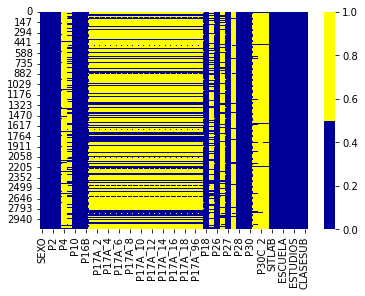

In [12]:
#Comprobamos que campos estan vacios con un heat map

colours = ['#000099', '#ffff00'] # Amarillo --> falta el campo ; Azul--> No falta.
sns.heatmap(data_util[cols].isnull(), cmap=sns.color_palette(colours))

Mostramos por pantalla los porcentajes de valores nulos por columna

In [13]:
for col in data_util.columns:
    pct_missing = np.mean(data_util[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

SEXO - 0%
EDAD - 0%
P2 - 0%
P3 - 0%
P4 - 91%
P4B - 69%
P10 - 0%
P16A - 0%
P16B - 0%
P17A_1 - 65%
P17A_2 - 65%
P17A_3 - 65%
P17A_4 - 65%
P17A_5 - 65%
P17A_6 - 65%
P17A_7 - 65%
P17A_8 - 65%
P17A_9 - 65%
P17A_10 - 65%
P17A_11 - 65%
P17A_12 - 65%
P17A_13 - 65%
P17A_14 - 65%
P17A_15 - 65%
P17A_16 - 65%
P17A_17 - 65%
P17A_18 - 65%
P17A_19 - 65%
P17A_96 - 65%
P17A_99 - 65%
P18 - 0%
P18A - 73%
P26 - 0%
P26A - 82%
P27 - 0%
P27A - 94%
P28 - 0%
P29 - 0%
P30 - 0%
P30C_1 - 95%
P30C_2 - 99%
P30C_3 - 99%
SITLAB - 0%
SITCONVIVEN - 0%
ESCUELA - 0%
CNO11R - 0%
ESTUDIOS - 0%
RELIGIONR - 0%
CLASESUB - 0%


In [14]:
data_util['P29'].value_counts()

2    2902
1     179
9       2
Name: P29, dtype: int64

Vamos a rellenar los valores nulos con lo que se corresponderia en la encuesta

In [15]:
#Los valores NaN del dataset se pueden sustituir por 0
data_util.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
for col in data_util.columns:
    pct_missing = np.mean(data_util[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

SEXO - 0%
EDAD - 0%
P2 - 0%
P3 - 0%
P4 - 0%
P4B - 0%
P10 - 0%
P16A - 0%
P16B - 0%
P17A_1 - 0%
P17A_2 - 0%
P17A_3 - 0%
P17A_4 - 0%
P17A_5 - 0%
P17A_6 - 0%
P17A_7 - 0%
P17A_8 - 0%
P17A_9 - 0%
P17A_10 - 0%
P17A_11 - 0%
P17A_12 - 0%
P17A_13 - 0%
P17A_14 - 0%
P17A_15 - 0%
P17A_16 - 0%
P17A_17 - 0%
P17A_18 - 0%
P17A_19 - 0%
P17A_96 - 0%
P17A_99 - 0%
P18 - 0%
P18A - 0%
P26 - 0%
P26A - 0%
P27 - 0%
P27A - 0%
P28 - 0%
P29 - 0%
P30 - 0%
P30C_1 - 0%
P30C_2 - 0%
P30C_3 - 0%
SITLAB - 0%
SITCONVIVEN - 0%
ESCUELA - 0%
CNO11R - 0%
ESTUDIOS - 0%
RELIGIONR - 0%
CLASESUB - 0%


### Agrupamiento y mapeado de variables

Dado que algunas columnas podrían agruparse en una misma, haremos esto para simplificar nuestro dataset y reducir la dimensionalidad, asi como para agrupar algunos valores que están mapeados en diferentes categorias en la misma


Generamos una copia del df para hacer pruebas y modificaciones relevantes

In [17]:
prueba = data_util.copy(deep = True)

####Mapeado columnas

##### Pregunta P4 y P4B

Columna 4: Los valores 0 de NP, corresponden a la misma categoria que los valores 2 (respuesta = 'No'). Esto es porque en la pregunta P3 ya le preguntamos  a la persona si había tenido covid, y si no lo ha tenido no puede haber estado hospitalizado por ello, por tanto no procede

In [18]:
for col in prueba.columns:
  print(prueba[col].value_counts())

2    1566
1    1517
Name: SEXO, dtype: int64
50    85
40    74
55    73
65    71
56    71
      ..
89     4
91     2
93     1
98     1
92     1
Name: EDAD, Length: 77, dtype: int64
2    2890
1     190
9       3
Name: P2, dtype: int64
2    2802
1     279
9       2
Name: P3, dtype: int64
0.0    2804
2.0     248
1.0      30
9.0       1
Name: P4, dtype: int64
0.0    2141
2.0     832
1.0     110
Name: P4B, dtype: int64
2    2593
1     487
9       3
Name: P10, dtype: int64
2    1988
1    1091
9       4
Name: P16A, dtype: int64
2    2267
1     774
9      42
Name: P16B, dtype: int64
0.0    1992
2.0     771
1.0     320
Name: P17A_1, dtype: int64
0.0    1992
2.0     951
1.0     140
Name: P17A_2, dtype: int64
0.0    1992
2.0    1021
1.0      70
Name: P17A_3, dtype: int64
0.0    1992
2.0     913
1.0     178
Name: P17A_4, dtype: int64
0.0    1992
2.0    1055
1.0      36
Name: P17A_5, dtype: int64
0.0    1992
2.0    1086
1.0       5
Name: P17A_6, dtype: int64
0.0    1992
2.0     949
1.0     142
Name

In [19]:
prueba['P4'] = prueba['P4'].map({0: 0, 1: 1, 2: 0, 9: 9})
prueba['P4B'] = prueba['P4B'].map({0: 0, 1: 1, 2: 0, 9: 9})



##### Pregunta Enfermedades Crónicas (P17A_...)
En las preguntas P17A_, pregunta por el tipo de enfermedad crónica que padece, por lo que vamos a generar para cada enfermedad, una columna con los valores 0 y 1, que significaran que no padece la enfermedad y que si la padece respectivamente.


{1:* Enfermedad cardiovascular
2:* Diabetes
3:* Cáncer
4:*Enfermedad respiratoria
5:* Enfermedad renal
6:* Esclerosis múltiple
7:* Enfermedad traumatológica
8:* Osteoporosis
9*Depresión grave
10* Demencia (alzhéimer, párkinson, etc.)
11*Enfermedad autoinmune
12* Otras enfermedades reumáticas
13* Enfermedades gastrointestinales
14*Enfermedades del sistema nervioso, 
neurológica/neuromuscular  
15* Colesterol
16* Alergias
17* Otras enfermedades y trastornos mentales
18* Enfermedades hepáticas
19* Patologías del trastorno del sueño
20* Otra
21* Varias enfermedades cronicas}



In [20]:
for col in prueba.loc[:,"P17A_1":"P17A_99"].columns:
  prueba[col] = prueba[col].map({0: 0,1: 1, 2: 0 })


##### Pregunta Hijos (P18 y P18A)
En la pregunta P18A, donde pregunta por el número de hijos, convertimos aquellas personas que no contestaron (con código de respuesta 9), a personas con 0 hijos, y para personas con más de 3 hijos los dejamos con el numero 3


In [21]:
prueba['P18A'] = prueba['P18A'].map({0:0,1:1,2:2,3:3,4:3,5:3,6:3,7:3,9:9})
print(prueba['P18A'].value_counts())


0    2240
1     421
2     361
3      60
9       1
Name: P18A, dtype: int64


In [22]:
prueba['P18'] = prueba['P18'].map({0: 0,1: 1, 2: 0, 9: 9})
prueba['P18'].value_counts()

0    2234
1     843
9       6
Name: P18, dtype: int64

#### Creacion columnas por trastorno mental sufrido antes y despues de la pandemia (P26A y P27A)

Dado que en esta pregunta esta cada trastorno mental codificado con un número y esto no viene bien para los algoritmos, vamos a crear para cada trastorno una columna, en la que el valor sera 1 si posee dicho trastorno y 0 si no lo posee.

Sin embargo cuando el numero de casos positivos de dicho trastorno sea muy bajo no crearemos la columna, decidimos que minimo un 2% de los entrevistados han de poseer dicho trastorno para que generemos una columna con el nombre de dicho trastorno.


In [23]:
#Lista con los nombres de los trastornos que tenemos codificados
trastornos = ["Trastorno_de_conducta", "Trastorno_depresivo","Trastorno_ansioso", "Trastorno_de_personalidad", "Psicosis",
              "Trastornos_alimenticios", "Trastorno_estrés_laboral", "Trastornos_adictivos","Trastorno_de_estrés_postraumático",
              "Trastorno_de_ansiedad_por_enfermedad", "Trastornos_de_relaciones_afectivas_de_pareja", 
              "Trastorno_de_las_relaciones_emocionales", "Trastorno_por_pérdida_o_duelo", "Trastornos_del_sueño", "Otros", "N.C"]
#Numero asociado a cada trastorno
lista = np.arange(1,15).tolist() + [96,99]

n_filas=len(prueba['P27A'])
#Numero maximo de valores negativos que puede haber en una columna para que la creemos (un 98% del total en este caso)
max_negativos=n_filas*0.98

for pregunta,periodo in zip(['P26A','P27A'],['antes','despues']):
  
  for i,j in zip(trastornos,lista):
    
    #Comprobamos cuantos registros tiene cada trastorno, y si superan un 2% del total, creamos la nueva columna
    mapeado=(prueba[pregunta] == j).map({True: 1, False: 0})
    conteo=mapeado.value_counts()
    
    if conteo[0] <= max_negativos:
      
      print('creada la columna ', i+'_'+periodo, ' con %i valores positivos %.2f' %(conteo[1],100*conteo[1]/n_filas),"% del total")
      prueba[i+'_'+periodo] = mapeado

prueba.drop(['P26A','P27A'],  axis = 1, inplace = True)

creada la columna  Trastorno_depresivo_antes  con 211 valores positivos 6.84 % del total
creada la columna  Trastorno_ansioso_antes  con 179 valores positivos 5.81 % del total
creada la columna  Trastorno_depresivo_despues  con 70 valores positivos 2.27 % del total
creada la columna  Trastorno_ansioso_despues  con 86 valores positivos 2.79 % del total


#### Creacion columna familiares medicandose si o no (P30C_1, P30C_2, P30C_3)
Podriamos crear una categoria que nos indique si el entrevistado/a tiene familiares medicandose



In [24]:
#Generamos las columnas en las que colocamos si el familiar 1, 2 o 3 se medica
try:
  prueba['familiar1medicandose'] = (prueba['P30C_1'] == 1).map({True: 1, False: 0})
  prueba['familiar2medicandose'] = (prueba['P30C_2'] == 1).map({True: 1, False: 0})
  prueba['familiar3medicandose'] = (prueba['P30C_3'] == 1).map({True: 1, False: 0})

  #Esta no creo que sea necesaria
  prueba['numerofamiliaresmedicandose'] = prueba['familiar1medicandose']+prueba['familiar2medicandose']+prueba['familiar3medicandose'] 

  #Generamos la columna familiaresmedicandose_si_no que vale 0 si no tiene, y 1 si tiene 1 o mas famiiares medicandose
  prueba['familiaresmedicandose_si_no'] = prueba['numerofamiliaresmedicandose'].map({0: 0, 1: 1, 2: 1, 3: 1})


  print("Valores nueva columna 'familiaresmedicandose' \n",prueba['numerofamiliaresmedicandose'].value_counts())

  #Eliminamos las columnas 'familiar1medicandose','familiar2medicandose','familiar3medicandose'
  COL_ELIM = ['familiar1medicandose','familiar2medicandose','familiar3medicandose','P30C_1','P30C_2','P30C_3','numerofamiliaresmedicandose']

  prueba.drop(COL_ELIM,  axis = 1, inplace = True)
except:
  print("ya no existen")

Valores nueva columna 'familiaresmedicandose' 
 0    2967
1     107
2       7
3       2
Name: numerofamiliaresmedicandose, dtype: int64


#### Renombramos variables

In [25]:
prueba.rename(columns={'P26': 'Tratamiento_psi_antes', 'P27': 'Tratamiento_psi_desp',
                       'P28': 'Tratamiento_far_antes','P29': 'Tratamiento_far_desp'},
              inplace=True)

### Eliminacion registros con muchos campos N.C

En este dataset ya tratado que poseemos, los campos rellenos con el valor 9 representan la respuesta 'NC', que significa 'No Contesta', por lo que no nos está aportando información, y por tanto si vemos alguna fila que posea muchos de sus campos con estos valores procederemos a eliminarla. Si vemos que el total de filas que poseen al menos una fila con el valor 9 es bajo, eliminamos todas aquellas filas con algun valor vacio.

Comprobamos cuantas filas hay vacias para cada columna

In [26]:
for col in prueba.columns:
  pct = (prueba[col]==9)
  print('{} - {}% - Total Filas Nulas: {}'.format(col, round(np.mean(pct)*100,2), pct.sum()))

SEXO - 0.0% - Total Filas Nulas: 0
EDAD - 0.0% - Total Filas Nulas: 0
P2 - 0.1% - Total Filas Nulas: 3
P3 - 0.06% - Total Filas Nulas: 2
P4 - 0.03% - Total Filas Nulas: 1
P4B - 0.0% - Total Filas Nulas: 0
P10 - 0.1% - Total Filas Nulas: 3
P16A - 0.13% - Total Filas Nulas: 4
P16B - 1.36% - Total Filas Nulas: 42
P17A_1 - 0.0% - Total Filas Nulas: 0
P17A_2 - 0.0% - Total Filas Nulas: 0
P17A_3 - 0.0% - Total Filas Nulas: 0
P17A_4 - 0.0% - Total Filas Nulas: 0
P17A_5 - 0.0% - Total Filas Nulas: 0
P17A_6 - 0.0% - Total Filas Nulas: 0
P17A_7 - 0.0% - Total Filas Nulas: 0
P17A_8 - 0.0% - Total Filas Nulas: 0
P17A_9 - 0.0% - Total Filas Nulas: 0
P17A_10 - 0.0% - Total Filas Nulas: 0
P17A_11 - 0.0% - Total Filas Nulas: 0
P17A_12 - 0.0% - Total Filas Nulas: 0
P17A_13 - 0.0% - Total Filas Nulas: 0
P17A_14 - 0.0% - Total Filas Nulas: 0
P17A_15 - 0.0% - Total Filas Nulas: 0
P17A_16 - 0.0% - Total Filas Nulas: 0
P17A_17 - 0.0% - Total Filas Nulas: 0
P17A_18 - 0.0% - Total Filas Nulas: 0
P17A_19 - 0.0

In [27]:
prueba2= prueba.copy(deep = True)

In [28]:
for col in prueba2.columns:
  pct = (prueba2[col]==9)
  indices_vacios=prueba2[pct].index.tolist()
  prueba2.drop(indices_vacios, axis = 0, inplace = True)
  pct_after = (prueba2[col]==9)
  print('{} - {}% - Total Filas Nulas: {}'.format(col, round(np.mean(pct_after)*100,2), pct_after.sum()))

print('La longitud del df pasa de {} a {} filas, es decir, eliminamos un {}% del total'.format(
    len(prueba),len(prueba2),round(100-100*len(prueba2)/len(prueba),2)))

SEXO - 0.0% - Total Filas Nulas: 0
EDAD - 0.0% - Total Filas Nulas: 0
P2 - 0.0% - Total Filas Nulas: 0
P3 - 0.0% - Total Filas Nulas: 0
P4 - 0.0% - Total Filas Nulas: 0
P4B - 0.0% - Total Filas Nulas: 0
P10 - 0.0% - Total Filas Nulas: 0
P16A - 0.0% - Total Filas Nulas: 0
P16B - 0.0% - Total Filas Nulas: 0
P17A_1 - 0.0% - Total Filas Nulas: 0
P17A_2 - 0.0% - Total Filas Nulas: 0
P17A_3 - 0.0% - Total Filas Nulas: 0
P17A_4 - 0.0% - Total Filas Nulas: 0
P17A_5 - 0.0% - Total Filas Nulas: 0
P17A_6 - 0.0% - Total Filas Nulas: 0
P17A_7 - 0.0% - Total Filas Nulas: 0
P17A_8 - 0.0% - Total Filas Nulas: 0
P17A_9 - 0.0% - Total Filas Nulas: 0
P17A_10 - 0.0% - Total Filas Nulas: 0
P17A_11 - 0.0% - Total Filas Nulas: 0
P17A_12 - 0.0% - Total Filas Nulas: 0
P17A_13 - 0.0% - Total Filas Nulas: 0
P17A_14 - 0.0% - Total Filas Nulas: 0
P17A_15 - 0.0% - Total Filas Nulas: 0
P17A_16 - 0.0% - Total Filas Nulas: 0
P17A_17 - 0.0% - Total Filas Nulas: 0
P17A_18 - 0.0% - Total Filas Nulas: 0
P17A_19 - 0.0% - T

Reseteamos los indices tras la eliminacion de algunas de las filas

In [29]:
prueba2.reset_index(drop=True, inplace=True)


In [30]:
prueba2.shape

(2798, 49)

### Creación Nuevas Variables

Vamosa generar nuevas variables:

·[psic_antes] - Valores {0:No, 1:Si}

·[psic_despues] - Valores {0:No, 1:Si}

·[psic_antes_y_despues] - Valores {0:No, 1:Si}

·[farm_antes] - Valores {0:No, 1:Si}

·[farm_despues] - Valores {0:No, 1:Si}

·[farm_antes_y_despues] - Valores {0:No, 1:Si}

·[psic_y_farm_antes] - Valores {0:No, 1:Si}

·[psic_y_farm_despues] - Valores {0:No, 1:Si}

·[psic_y_farm_antes_y_despues] - Valores {0:No, 1:Si}


In [31]:
for i in ['Tratamiento_psi_antes', 'Tratamiento_psi_desp', 'Tratamiento_far_antes', 'Tratamiento_far_desp']:
  print(prueba2[i].value_counts())

2    2316
1     482
Name: Tratamiento_psi_antes, dtype: int64
2    2621
1     177
Name: Tratamiento_psi_desp, dtype: int64
2    2563
1     235
Name: Tratamiento_far_antes, dtype: int64
2    2636
1     162
Name: Tratamiento_far_desp, dtype: int64


In [32]:
#Definimos el nombre de las columnas que vamos a generar
nuevas_variables=['psic_antes', 'psic_despues', 'psic_antes_y_despues', 'farm_antes', 'farm_despues', 'farm_antes_y_despues',
    'psic_y_farm_antes', 'psic_y_farm_despues', 'psic_y_farm_antes_y_despues', 'nunca_psic_o_farm']
#Las creamos todas, y les damos el valor inicial de 0 a todos los registros
prueba2[nuevas_variables] = 0

#Creamos una lista con los nombres de las columnas de nuestro dataset que usaremos para generar las nuevas varaibles 
obj=['Tratamiento_psi_antes', 'Tratamiento_psi_desp', 'Tratamiento_far_antes', 'Tratamiento_far_desp']

#Dado que 1=Si y 2=No, definimos para cada una de las nuevas varaibles cuales deben ser los valores de cada una de las variables dentro de la lista obj
psic_antes = [1,2,2,2]
psic_despues = [2,1,2,2]
psic_antes_y_despues = [1,1,2,2]
farm_antes = [2,2,1,2]
farm_despues = [2,2,2,1]
farm_antes_y_despues = [2,2,1,1]
psic_y_farm_antes = [1,2,1,2]
psic_y_farm_despues = [2,1,2,1]
psic_y_farm_antes_y_despues = [1,1,1,1]
nunca_psic_o_farm = [2,2,2,2]

#Recorremos cada fila, y dependiendo de que columnas de la lista obj tengan valor positivo, cambiamos el valor de la nueva varaible a 1.
for row in range(0,len(prueba2)):
  
  if (prueba2.loc[row,obj] == psic_antes).all():
    prueba2.loc[row,'psic_antes'] = 1

  elif (prueba2.loc[row,obj] == psic_despues).all():
    prueba2.loc[row,'psic_despues'] = 1

  elif (prueba2.loc[row,obj] == psic_antes_y_despues).all():
    prueba2.loc[row,'psic_antes_y_despues'] = 1  

  elif (prueba2.loc[row,obj] == farm_antes).all():
    prueba2.loc[row,'farm_antes'] = 1

  elif (prueba2.loc[row,obj] == farm_despues).all():
    prueba2.loc[row,'farm_despues'] = 1

  elif (prueba2.loc[row,obj] == farm_antes_y_despues).all():
    prueba2.loc[row,'farm_antes_y_despues'] = 1
  
  elif (prueba2.loc[row,obj] == psic_y_farm_antes).all():
    prueba2.loc[row,'psic_y_farm_antes'] = 1

  elif (prueba2.loc[row,obj] == psic_y_farm_despues).all():
    prueba2.loc[row,'psic_y_farm_despues'] = 1

  elif (prueba2.loc[row,obj] == psic_y_farm_antes_y_despues).all():
    prueba2.loc[row,'psic_y_farm_antes_y_despues'] = 1
  
  elif (prueba2.loc[row,obj] == nunca_psic_o_farm).all():
    prueba2.loc[row,'nunca_psic_o_farm'] = 1

#ahora eliminamos las variables que poseiamos originalemnte, las que estan en la lista obj
prueba2.drop(obj,axis=1,inplace=True)

In [33]:
for col in nuevas_variables:
  print(prueba2[col].value_counts())

0    2546
1     252
Name: psic_antes, dtype: int64
0    2768
1      30
Name: psic_despues, dtype: int64
0    2760
1      38
Name: psic_antes_y_despues, dtype: int64
0    2748
1      50
Name: farm_antes, dtype: int64
0    2759
1      39
Name: farm_despues, dtype: int64
0    2783
1      15
Name: farm_antes_y_despues, dtype: int64
0    2719
1      79
Name: psic_y_farm_antes, dtype: int64
0    2775
1      23
Name: psic_y_farm_despues, dtype: int64
0    2760
1      38
Name: psic_y_farm_antes_y_despues, dtype: int64
1    2156
0     642
Name: nunca_psic_o_farm, dtype: int64


### Evaluación correlaciones entre variables

Vamos a evaluar la correlación entre las variables mediante una matriz, en la que usaremos como coeficiente el Coeficiente de Correlación de Pearson. En el caso de que alguna de las correlaciones sea cercana a 1, eliminamos una de las varaibles, ya que no aportará nada de información a los modelos. Vamos a mostrar por pantalla todas auqellas correlaciones con valores superiores a 0.5, para comprobar la cantidad que tenemos.

In [34]:
corr_matrix = prueba2.corr(method='pearson')


In [35]:
for i in corr_matrix:
  n=0
  for j in corr_matrix[i]:
    if j>0.5 and corr_matrix.columns[n] != i:
      print('Correlacion entre {} y {} = {}'.format(i,corr_matrix.columns[n],j))
    n+=1


Correlacion entre P18 y P18A = 0.907906281644126
Correlacion entre P18A y P18 = 0.907906281644126
Correlacion entre SITLAB y CNO11R = 0.5726792507638222
Correlacion entre CNO11R y SITLAB = 0.5726792507638222


La unica columna que parece que podríamos eliminar es la P18A, ya que esta muy correlacionada con la 18, ya que una pregunta por si se tienen hijos o no, y la otra por el numero de hijos

In [36]:
prueba2.shape

(2798, 55)

In [37]:
try:
  prueba2.drop(['P18A'], axis=1, inplace=True)
except:
  print("ya no existe")


### Eliminacion columnas con pocos valores positivos

Comporbamos que columnas tienen entre sus posibles valores, algunos que representen menos del 1% del total. Estudiaremos estas columnas, y si consideramos que el echo de que ese determinado valor sea tan reducido implica que la columna no nos genera demasiada información, procedemos a eliminarla

In [38]:
n_row=len(prueba2)
for col in prueba2.columns:
  n=0
  valores = prueba2[col].value_counts()
  for val in valores:
    pct = round(100*val/n_row,2)
    if pct < 2:
      print('La columna {} tiene un {}% con valor {}'.format(col,pct,valores.index.tolist()[n]))
    n+=1

La columna EDAD tiene un 1.97% con valor 52
La columna EDAD tiene un 1.97% con valor 41
La columna EDAD tiene un 1.97% con valor 54
La columna EDAD tiene un 1.93% con valor 48
La columna EDAD tiene un 1.89% con valor 57
La columna EDAD tiene un 1.89% con valor 51
La columna EDAD tiene un 1.86% con valor 53
La columna EDAD tiene un 1.82% con valor 38
La columna EDAD tiene un 1.82% con valor 66
La columna EDAD tiene un 1.82% con valor 46
La columna EDAD tiene un 1.79% con valor 72
La columna EDAD tiene un 1.75% con valor 58
La columna EDAD tiene un 1.72% con valor 62
La columna EDAD tiene un 1.72% con valor 67
La columna EDAD tiene un 1.68% con valor 49
La columna EDAD tiene un 1.61% con valor 37
La columna EDAD tiene un 1.61% con valor 68
La columna EDAD tiene un 1.61% con valor 39
La columna EDAD tiene un 1.57% con valor 59
La columna EDAD tiene un 1.39% con valor 27
La columna EDAD tiene un 1.39% con valor 25
La columna EDAD tiene un 1.39% con valor 73
La columna EDAD tiene un 1.39% c

In [39]:
COL_ELIM = ['P17A_5', 'P17A_6','P17A_8', 'P17A_9', 'P17A_10', 'P17A_13', 'P17A_14', 'P17A_15', 'P17A_16', 'P17A_17', 'P17A_18', 'P17A_19', 
            'P17A_99']
prueba2.drop(COL_ELIM, axis=1, inplace=True)

print('Se han eliminado %i columnas por tener pocos valores positivos' %len(COL_ELIM))


Se han eliminado 13 columnas por tener pocos valores positivos


Vemos que las columas EDAD, CNO11R, ESTUDIOS, SITLAB al tener muchos posibles valores, algunos de ellos no llegan a representar un porcentaje elevado, pero no vamos a eliminarlas ya que nos siguen aportando información.

Sin embargo, las columnas P17A_ que aparecen en la lista, representan cada una una enfermedad crónica, y al no tener una representación significativa sobre el conjunto total de los datos, podemos eliminarlas. **La P4 por su relevancia vamos a dejarla a pesar de sus pocos valores positivos (Hospitalización por Covid ahora o en el pasado de la
persona entrevistada)**

### Mapeado Final



In [40]:
prueba2['P30'] = prueba2['P30'].map({0: 0, 1: 1, 2: 0, 8: 0})



for col in prueba2.columns:
  if len(prueba2[col].value_counts()) == 2:
    prueba2[col] = prueba2[col].map({0: 0, 1: 1, 2: 0})


## Seleccion de características relevantes

In [41]:
#Importamos las librerias que usaremos en esta seccion
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from scipy.stats import chi2_contingency, ttest_rel, ttest_ind, chisquare
from scipy import spatial
from numpy import ravel
from scipy.spatial.distance import euclidean
import itertools

### Generación de datasets solo con las columnas objetivo

Dado que tenemos muchas variables aún tras el preproceso, primero comenzaremos a trabajar con uno con menos variables, para ver los resultados que vamos obteniendo, y luego ampliaremos al dataset completo

In [42]:

VARIABLES = ['SEXO', 'EDAD', 'P2', 'P3', 'P4', 'P4B', 'P10', 'P16A', 'P16B',
       'P17A_1', 'P17A_2', 'P17A_3', 'P17A_4', 'P17A_7', 'P17A_11', 'P17A_12',
       'P17A_96', 'P18', 'P30', 'SITLAB', 'SITCONVIVEN', 'ESCUELA', 
       'ESTUDIOS', 'RELIGIONR', 'CLASESUB', 'Trastorno_depresivo_antes',
       'Trastorno_ansioso_antes', 'Trastorno_depresivo_despues',
       'Trastorno_ansioso_despues']
#'Ocupaciones' debería estar pero no me gusta
VARIABLES_RENOMB = ['Sexo', 'Edad', 'Sanitario', 'Tenencia_Covid', 'Hospitalizacion_Covid', 
                    'Fallecimiento_Familiar_por_Covid', 'Ataques_Ansiedad', 'Enfermedad_Cronica', 
                    'Enfermedad_Cronica_Familiar', 'Enfermedad_Cardiovascular', 'Diabetes', 
                    'Cancer', 'Enfermedad_Respiratoria', 'Enfermedad_Traumatologica', 
                    'Enfermedad_Autoinmune', 'Otra_Enfermedad_Cronica','Trastorno_Sueño', 
                    'Tenencia_de_Hijos', 'Medicacion_Familiar_por_Salud_Mental', 'Situacion_Laboral', 
                    'Situacion_Convivencia', 'Escolarizacion', 'Estudios', 'Religion', 
                    'Clase_Social', 'Trastorno_Depresivo_Antes','Trastorno_Ansioso_Antes', 
                    'Trastorno_Depresivo_Despues','Trastorno_Ansioso_Despues']

nuevas_variables=['psic_antes', 'psic_despues', 'psic_antes_y_despues', 'farm_antes', 'farm_despues', 'farm_antes_y_despues',
    'psic_y_farm_antes', 'psic_y_farm_despues', 'psic_y_farm_antes_y_despues', 'nunca_psic_o_farm']

X = prueba2[VARIABLES]
X.columns = VARIABLES_RENOMB

Y = prueba2[nuevas_variables]

#Aquellas variables que vamos a representar en el trabajo
variables_salida = ['psic_antes', 'psic_despues', 'psic_antes_y_despues', 'farm_antes', 'farm_despues', 'farm_antes_y_despues','nunca_psic_o_farm']

In [43]:
X.shape,Y.shape

((2798, 29), (2798, 10))

## Algortimos Seleccion Caracteristicas K-Best con Informacion_Mutua y Chi2





### Seleccion de características mediante f-classsic para cada variable objetivo

In [ ]:
Variables_reducidas =['Sexo', 'Edad', 'Sanitario', 'Tenencia_Covid', 'Hospitalizacion_Covid', 
                    'Fallecimiento_Familiar_por_Covid', 'Ataques_Ansiedad', 'Enfermedad_Cronica', 
                    'Enfermedad_Cronica_Familiar', 'Enfermedad_Cardiovascular', 'Diabetes', 
                    'Cancer', 'Enfermedad_Respiratoria', 'Enfermedad_Traumatologica', 
                    'Enfermedad_Autoinmune', 'Otra_Enfermedad_Cronica','Trastorno_Sueño', 
                    'Tenencia_de_Hijos', 'Medicacion_Familiar_por_Salud_Mental', 'Situacion_Laboral', 
                    'Situacion_Convivencia', 'Escolarizacion', 'Estudios', 'Religion', 
                    'Clase_Social']

variables_salida = ['psic_antes', 'psic_despues', 'psic_antes_y_despues', 'farm_antes', 'farm_despues', 'farm_antes_y_despues','nunca_psic_o_farm']
#Definimos los dataframes donde almacenaremos los datos con los k-scores
KBest_scores = pd.DataFrame(index = VARIABLES_RENOMB)
KBest_scores_norm = pd.DataFrame(index = VARIABLES_RENOMB)
KBest_scores['VARIABLES'] = VARIABLES_RENOMB
for col in nuevas_variables:
  salida = SelectKBest( k='all')
  salida.fit(X[VARIABLES_RENOMB],Y[col])
  scores = np.round(salida.scores_,3)
  pct = np.round(scores/scores.max(),3)
  KBest_scores[col] = scores
  KBest_scores_norm[col] = pct

  plt.figure(figsize=(5,8))
  sns.barplot(x = col, y = 'VARIABLES', data = KBest_scores, orient = "h", 
              order = KBest_scores.sort_values(col,ascending = False).VARIABLES,
              palette = sns.color_palette("ch:s=.25,rot=-.25_r",n_colors=len(scores)))
  plt.xlabel('K-Best scores')
  plt.ylabel('')
  plt.title('K-Best scores para columna objetivo: '+ col)
  plt.show()

KBest_scores.drop('VARIABLES',axis = 1, inplace = True)
#KBest_scores.head(35)
KBest_scores_norm.head(30)


In [ ]:
round(100*pd.crosstab(X.Medicacion_Familiar_por_Salud_Mental,Y.farm_antes_y_despues,normalize=True, margins=True),3)

### Seleccion de características mediante K-Best-Chi2 para cada variable objetivo



In [ ]:
#Creamos los dataframes donde vamos a almacenar nuestros datos
ChiSquare_scores = pd.DataFrame(index=VARIABLES_RENOMB)
ChiSquare_scores_max = pd.DataFrame(index=VARIABLES_RENOMB)
ChiSquare_scores['VARIABLES']  = VARIABLES_RENOMB

#Recorremos cada una de las variables objetivo
for col in nuevas_variables:
  #Obtenemos los valores del test chi2 y sus p-values asociados
  chidos,pvalue = chi2(X, Y[col])
  #Almacenamos los chi obtenidos para cada variable en la columna correspondiente
  ChiSquare_scores[col] = chidos
  ChiSquare_scores_max[col] = chidos/chidos.max()
  #Representamos las graficas
  plt.figure(figsize=(8,6))
  figura = sns.barplot(x = col, y = 'VARIABLES', data = ChiSquare_scores, orient = "h",
              order = ChiSquare_scores.sort_values(col,ascending = False).VARIABLES,
              palette = sns.color_palette("ch:s=.25,rot=-.25_r",n_colors=24))
  plt.title('Chi-square scores para la columna objetivo: '+ col)
  plt.xlabel('Chi Square Score')
  plt.ylabel('Variables')
  #plt.savefig(f"{images_dir}/CHISQUARE_{col}_fig.png",bbox_inches='tight')
  #files.download(f"{images_dir}/CHISQUARE_{col}_fig.png")
  plt.show()
  
  #
  ChiSquare_scores[col] = ChiSquare_scores[col].astype('string')
  ChiSquare_scores_max[col] = ChiSquare_scores_max[col].astype('string')

  for i in range(0,len(pvalue)):
    if pvalue[i] < 0.001:
      ChiSquare_scores[col][i] = str(round(chidos[i],3)) + "***" 
      ChiSquare_scores_max[col][i] = str(round(chidos[i]/chidos.max(),3)) + "***" 

    elif pvalue[i] < 0.01:
      ChiSquare_scores[col][i] = str(round(chidos[i],3)) + "**"
      ChiSquare_scores_max[col][i] = str(round(chidos[i]/chidos.max(),3)) + "**" 

    elif pvalue[i] < 0.05:
      ChiSquare_scores[col][i] = str(round(chidos[i],3)) + "*"
      ChiSquare_scores_max[col][i] = str(round(chidos[i]/chidos.max(),3)) + "*" 

    else:
      ChiSquare_scores[col][i] = str(round(chidos[i],3))
      ChiSquare_scores_max[col][i] = str(round(chidos[i]/chidos.max(),3))

#ChiSquare_scores.drop('VARIABLES', axis = 1, inplace = True)



## Variables categóricas Test-ChiSquare 

In [ ]:
prueba3 = prueba2[VARIABLES + nuevas_variables]
prueba3.columns = VARIABLES_RENOMB + nuevas_variables

In [47]:
VAR_CAT = ['Sexo', 'Sanitario', 'Tenencia_Covid', 'Hospitalizacion_Covid', 
            'Fallecimiento_Familiar_por_Covid', 'Ataques_Ansiedad', 'Enfermedad_Cronica', 
            'Enfermedad_Cronica_Familiar', 'Enfermedad_Cardiovascular', 'Diabetes', 
            'Cancer', 'Enfermedad_Respiratoria', 'Enfermedad_Traumatologica', 
            'Enfermedad_Autoinmune', 'Otra_Enfermedad_Cronica','Trastorno_Sueño', 
            'Tenencia_de_Hijos', 'Medicacion_Familiar_por_Salud_Mental', 'Situacion_Laboral', 
            'Situacion_Convivencia', 'Escolarizacion','Estudios', 'Religion', 
            'Clase_Social', 'Trastorno_Depresivo_Antes','Trastorno_Ansioso_Antes', 
            'Trastorno_Depresivo_Despues','Trastorno_Ansioso_Despues']        

X_CAT = X[VAR_CAT]

#Creamos los dataframes donde vamos a almacenar nuestros datos
ChiSquare = pd.DataFrame(index=VAR_CAT)
ChiSquare_Relevantes = pd.DataFrame(index=VAR_CAT)

#Definimos el diccionario donde almacenaremos lso valores de los porcentajes de cada categoria
pct_categorias = {}
#Definimos un diccionario, que almacene para cada vaaible objetivo, cuales son las varaibles relevantes (p_value <= 0.5)
variables_relevantes = {}

for col in nuevas_variables:
  ChiSquare[col] = 0
  lista_pct_categorias = []
  lista_indices_categorias = []
  lista_nombre_variables = []
  var_relevantes = []
  for row in VAR_CAT:
    #Creamos una tabla de contingencia para la variable y la variable objetivo y calculamos el test chisquare
    tabla_contingencia = pd.crosstab(X_CAT[row], Y[col])
    chisquare_test, p_value_chisquare, degrees_freedom, array = chi2_contingency(tabla_contingencia)
    #Añadimos el resultado al df 
    ChiSquare.loc[row,col] = round(p_value_chisquare,3)
    #Si son relevantes, añadimos un 1 a dicha variable en el df ChiSquare_Relevantes
    if p_value_chisquare <= 0.05:
      ChiSquare_Relevantes.loc[row,col] = 1
      var_relevantes.append(row)
    else:
      ChiSquare_Relevantes.loc[row,col] = 0 
    #Pasamos a porcentaje la tabla de contingencia
    tabla_contingencia_pct = round(100*tabla_contingencia/len(X),2)
    #La convertimos en un array 1D
    tabla_contingencia_pct = np.array(tabla_contingencia_pct).ravel()
    #Añadimos a la lista los porcentajes de cada categoría de todas las variables.
    lista_pct_categorias.extend(tabla_contingencia_pct)
    #Hacemos una lista con las posibles combinaciones entre las categorias de la varaible y la variable objetivo
    combinaciones_categorias = list(itertools.product(tabla_contingencia.index.to_list(),tabla_contingencia.columns.to_list()))
    lista_indices_categorias.extend(combinaciones_categorias)
    lista_nombre_variables.extend([row]*len(combinaciones_categorias))
  
  #Añadimos al diccionario la lista con los porcentajes de las categorias de todas las variables
  pct_categorias[col] = lista_pct_categorias
  #Añadimos al diccionario 'variables_relevantes' el par clave valor (nombre variable objetivo, variables relevantes para esta)
  variables_relevantes[col] = var_relevantes
#Añadimos la columna 'Combinacion categorias' en la que estaran el indice de la columna y fila
pct_categorias['Combinacion categorias'] = lista_indices_categorias
#Generamos el DataFrame a partir del diccionario anterior

df_pct_varibles = pd.DataFrame(pct_categorias, index = lista_nombre_variables)

df_pct_varibles = df_pct_varibles[['Combinacion categorias','psic_antes', 'psic_despues', 'psic_antes_y_despues', 
                                   'farm_antes', 'farm_despues', 'farm_antes_y_despues','psic_y_farm_antes', 
                                   'psic_y_farm_despues', 'psic_y_farm_antes_y_despues', 'nunca_psic_o_farm']]

df_pct_varibles['Combinacion categorias'] = df_pct_varibles['Combinacion categorias'].astype('string')
#Debe haber 208 filas, porque son 104 categorias en total de las variables * 2 posibles categorias de las variables objetivo


In [ ]:
#ChiSquare.head(35)
#ChiSquare_Relevantes[variables_salida].head(30)
#variables_salida2 = ['Combinacion categorias','psic_antes', 'psic_despues', 'psic_antes_y_despues', 'farm_antes', 'farm_despues', 'farm_antes_y_despues','nunca_psic_o_farm']
#df_pct_varibles[variables_salida2].head(8)


In [ ]:
caracteristicas_relevantes = []
for i in ['farm_antes', 'farm_despues', 'farm_antes_y_despues']:
  lista_relevantes = ChiSquare_Relevantes[ChiSquare_Relevantes[i] == 1][i].index.to_list()
  for rel in lista_relevantes:
    if rel not in caracteristicas_relevantes:
      caracteristicas_relevantes.append(rel)
    else: pass
#print(len(caracteristicas_relevantes))

In [ ]:
for var in variables_salida:
  relevantes = variables_relevantes['psic_despues']
  sns.countplot( x ='variable', hue ='value', data = pd.melt(X_CAT[relevantes]))
  plt.title('Distribucion de variables relevantes para la variable objetivo: {}'.format(var))
  plt.xticks(rotation=45, ha='right')
  plt.xlabel('Variables')
  plt.ylabel('Numero de registros')

  plt.show()


In [ ]:
#round(100*pd.crosstab(X_CAT['Sanitario'], Y['psic_antes'],normalize=True,margins=True),3)
#print("\n")
#round(100*pd.crosstab(X_CAT['Sanitario'], Y['psic_despues'],normalize=True,margins=True),3)
#print("\n")
#round(100*pd.crosstab(X_CAT['Sanitario'], Y['psic_antes_y_despues'],normalize=True,margins=True),3)

#round(100*pd.crosstab(X_CAT['Sexo'], Y['farm_antes'],normalize=True, margins=True),2)
#print("\n")
#round(100*pd.crosstab(X_CAT['Sexo'], Y['farm_despues'],normalize=True, margins=True),2)
#print("\n")
round(100*pd.crosstab(X_CAT['Sexo'], Y['farm_antes_y_despues'],normalize=True, margins=True),2)

#print(round(pd.crosstab(X_CAT['Hospitalizacion_Covid'], Y['psic_antes'],normalize=False,margins=True),3))
#print("\n")
#print(round(pd.crosstab(X_CAT['Hospitalizacion_Covid'], Y['psic_despues'],normalize=False,margins=True),3))
#print("\n")
#print(round(pd.crosstab(X_CAT['Hospitalizacion_Covid'], Y['psic_antes_y_despues'],normalize=False,margins=True),3))

farm_antes_y_despues,0,1,All
Sexo,,,
0,49.50,0.46,49.96
1,49.96,0.07,50.04
All,99.46,0.54,100.00


In [ ]:
Y['psic_antes_y_despues'].value_counts()
Y['psic_despues'].value_counts()

0    2768
1      30
Name: psic_despues, dtype: int64

### Matriz similitud coseno

In [ ]:
SimilitudCoseno = pd.DataFrame(index = nuevas_variables, columns = nuevas_variables)
for col in nuevas_variables:
  for row in nuevas_variables:
    #1 - spatial.distance.cosine equivale a la similitud coseno, dado que spatial.distance.cosine es la distancia
    SimilitudCoseno.loc[col,row] = round(1 - spatial.distance.cosine(ChiSquare_Relevantes[col],ChiSquare_Relevantes[row] ),3)

#SimilitudCoseno.loc[variables_salida,variables_salida].head(10)
 
#SimilitudCoseno.head(10)

### Matriz distancia euclidea entre combinaciones de categorias

In [51]:
DistanciasEuclideas = pd.DataFrame(index = nuevas_variables, columns = nuevas_variables)
for col in nuevas_variables:
  for row in nuevas_variables:
    DistanciasEuclideas.loc[col,row] = round(euclidean(df_pct_varibles[col], df_pct_varibles[row]),3)
#DistanciasEuclideas.loc[variables_salida,variables_salida].head(10)
DistanciasEuclideas.head(10)

,psic_antes,psic_despues,psic_antes_y_despues,farm_antes,farm_despues,farm_antes_y_despues,psic_y_farm_antes,psic_y_farm_despues,psic_y_farm_antes_y_despues,nunca_psic_o_farm
psic_antes,0.0,51.195,49.562,46.436,49.014,54.427,40.42,52.922,49.931,449.855
psic_despues,51.195,0.0,2.448,5.416,2.788,3.657,11.533,2.073,2.969,500.189
psic_antes_y_despues,49.562,2.448,0.0,4.551,2.612,5.366,10.005,3.768,2.655,498.753
farm_antes,46.436,5.416,4.551,0.0,3.164,8.259,6.924,6.881,4.703,495.314
farm_despues,49.014,2.788,2.612,3.164,0.0,5.631,9.326,4.201,2.908,497.976
farm_antes_y_despues,54.427,3.657,5.366,8.259,5.631,0.0,14.392,2.03,5.151,503.466
psic_y_farm_antes,40.42,11.533,10.005,6.924,9.326,14.392,0.0,13.004,9.941,489.731
psic_y_farm_despues,52.922,2.073,3.768,6.881,4.201,2.03,13.004,0.0,3.613,501.935
psic_y_farm_antes_y_despues,49.931,2.969,2.655,4.703,2.908,5.151,9.941,3.613,0.0,499.107
nunca_psic_o_farm,449.855,500.189,498.753,495.314,497.976,503.466,489.731,501.935,499.107,0.0


### Diagramas de frecuencia en las variables relevantes

## Variables continuas (T-Test):
En este caso solo disponemos de la EDAD como variable continua

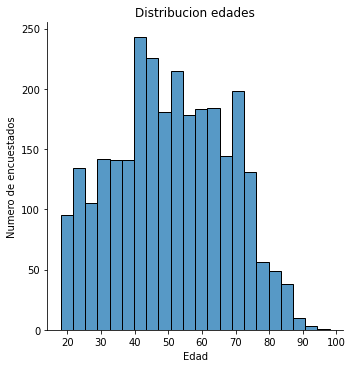

In [ ]:
#Distriucion de la edad
sns.displot(X, x="Edad")
plt.title('Distribucion edades')
plt.xlabel('Edad')
plt.ylabel('Numero de encuestados')
plt.show()

In [55]:
VAR_CONT = ['Edad']
X_CONT = X[VAR_CONT]

TTest_scores = pd.DataFrame(index=VAR_CONT)
TTest_p_values = pd.DataFrame(index=VAR_CONT)

for col in nuevas_variables:
  a = X_CONT[Y[col] == 1]['Edad']
  b = X_CONT[Y[col] == 0]['Edad']
  ttest,pvalue = ttest_ind(a, b)
  TTest_scores[col] = round(ttest, 3)
  TTest_p_values[col] = round(pvalue, 3)

#TTest_scores.loc[:,variables_salida].head()
#TTest_p_values.head(10)
TTest_scores.head(10)


,psic_antes,psic_despues,psic_antes_y_despues,farm_antes,farm_despues,farm_antes_y_despues,psic_y_farm_antes,psic_y_farm_despues,psic_y_farm_antes_y_despues,nunca_psic_o_farm
Edad,-4.568,-4.14,-4.457,3.993,-0.282,1.798,2.289,-1.289,-0.26,3.691


In [ ]:
for col in variables_salida:
  sns.boxplot(data = prueba2, x = col, y = 'EDAD')
  plt.ylabel('Edad')
  plt.title('Distribución Edad para la variable {}'.format(col))
  plt.show()

In [ ]:
#Almacenaremos en un df todos los valores con los valores positivos de cada variable farm
farm = pd.melt(Y[['farm_antes','farm_despues','farm_antes_y_despues']])
farm_pos = farm[farm['value'] == 1]
edad = []
for col in ['farm_antes','farm_despues','farm_antes_y_despues']:
  edad = edad + (prueba3[Y[col] == 1]['Edad']).to_list()
farm_pos['Edad'] = edad

sns.boxplot(data = farm_pos, x = 'variable', y = 'Edad')
plt.ylabel('Edad')
plt.xlabel('')
plt.title('Distribucion edades tratamientos farmacológicos')
plt.show()

#Almacenaremos en un df todos los valores con los valores positivos de cada variable psic
psic = pd.melt(Y[['psic_antes','psic_despues','psic_antes_y_despues']])
psic_pos = psic[psic['value'] == 1]
edad = []
for col in ['psic_antes','psic_despues','psic_antes_y_despues']:
  edad = edad + (prueba3[Y[col] == 1]['Edad']).to_list()
psic_pos['Edad'] = edad

sns.boxplot(data = psic_pos, x = 'variable', y = 'Edad')
plt.ylabel('Edad')
plt.xlabel('')
plt.title('Distribucion edades tratamientos psicológicos')
plt.show()

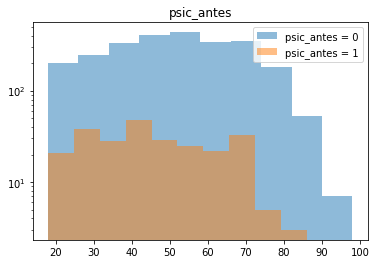

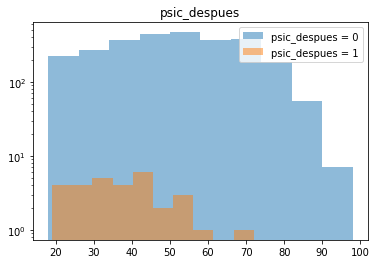

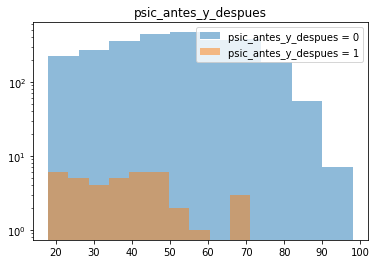

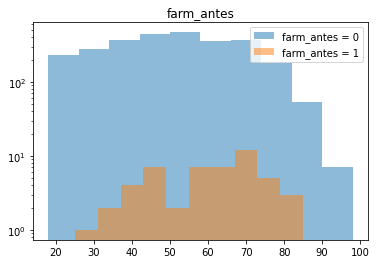

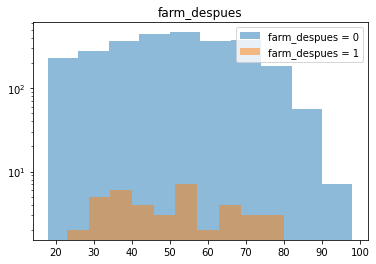

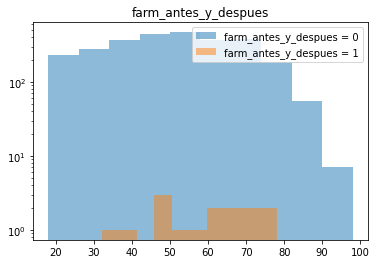

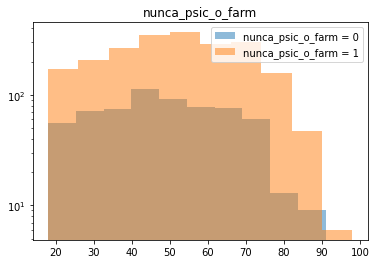

In [ ]:
#Histogramas superpuestos

for col in variables_salida:
  plt.hist(X_CONT[Y[col] == 0]['Edad'],  
         alpha=0.5, 
         label='{} = 0'.format(col),
         log = True) 
  
  plt.hist(X_CONT[Y[col] == 1]['Edad'],  
         alpha=0.5, 
         label='{} = 1'.format(col),
         log = True)
  plt.legend(loc='upper right') 
  plt.title('{}'.format(col)) 
  plt.show()
  



#Dudas



In [ ]:
a = pd.melt(prueba3[variables_salida])
b = []
for i in range(len(variables_salida)):
  b = np.append(b,X['Sexo'])
a['Sexo'] = b
a['index'] =range(len(a['Sexo']))
